<a href="https://colab.research.google.com/github/iamsoura005/Voice-Recognition-Software-to-Mitigate-Cyber-Frauds/blob/main/Voice%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install speechrecognition

In [5]:
!pip install speechrecognition
!pip install librosa
!pip install numpy
!pip install scipy

In [3]:
!ls /content/

1272-128104-0000.flac  84-121123-0000.flac


In [4]:
import speechrecognition as sr
import librosa
import numpy as np
import scipy.signal

# Initialize recognizer
recognizer = sr.Recognizer()

# Function to transcribe audio file
def transcribe_audio(file_path):
    with sr.AudioFile(file_path) as source:
        audio = recognizer.record(source)
        try:
            text = recognizer.recognize_google(audio)
            return text
        except sr.UnknownValueError:
            return "Could not understand audio"
        except sr.RequestError:
            return "API error"

# Function to extract audio features (mean pitch and energy)
def extract_features(file_path):
    try:
        # Load audio file
        y, sr = librosa.load(file_path, sr=None)

        # Extract pitch (using fundamental frequency estimation)
        pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
        pitch_mean = np.mean(pitches[pitches > 0]) if np.any(pitches > 0) else 0

        # Extract energy (RMS: root mean square)
        rms = librosa.feature.rms(y=y)
        energy_mean = np.mean(rms)

        return pitch_mean, energy_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return 0, 0

# Function to compare features and detect anomalies
def detect_anomaly(ref_features, test_features, threshold=0.2):
    pitch_ref, energy_ref = ref_features
    pitch_test, energy_test = test_features

    # Calculate relative differences
    pitch_diff = abs(pitch_ref - pitch_test) / max(pitch_ref, 1e-10)
    energy_diff = abs(energy_ref - energy_test) / max(energy_ref, 1e-10)

    # If differences exceed threshold, flag as potential fraud
    if pitch_diff > threshold or energy_diff > threshold:
        return "Potential fraud detected (significant voice differences)"
    return "Voice appears genuine"

# File paths for uploaded LibriSpeech audio (UPDATE THESE)
ref_file = "/content/84-121123-0000.wav"  # Reference audio (genuine voice)
test_file = "/content/1272-128104-0000.wav"  # Test audio (potential fraud)

# Transcribe audio files
print("Transcribing reference audio...")
ref_text = transcribe_audio(ref_file)
print(f"Reference audio transcription: {ref_text}")

print("\nTranscribing test audio...")
test_text = transcribe_audio(test_file)
print(f"Test audio transcription: {test_text}")

# Extract features
print("\nExtracting features...")
ref_features = extract_features(ref_file)
test_features = extract_features(test_file)
print(f"Reference features: Pitch={ref_features[0]:.2f} Hz, Energy={ref_features[1]:.4f}")
print(f"Test features: Pitch={test_features[0]:.2f} Hz, Energy={test_features[1]:.4f}")

# Detect anomalies
print("\nChecking for fraud...")
result = detect_anomaly(ref_features, test_features)
print(result)

ModuleNotFoundError: No module named 'speechrecognition'

In [6]:
!pip install speechrecognition

In [7]:
!pip install speechrecognition
!pip install librosa
!pip install numpy
!pip install scipy

In [8]:
!ls /content/

1272-128104-0000.flac  84-121123-0000.flac


In [10]:
import speechrecognition as sr
import librosa
import numpy as np
import scipy.signal

# Initialize recognizer
recognizer = sr.Recognizer()

# Function to transcribe audio file
def transcribe_audio(file_path):
    with sr.AudioFile(file_path) as source:
        audio = recognizer.record(source)
        try:
            text = recognizer.recognize_google(audio)
            return text
        except sr.UnknownValueError:
            return "Could not understand audio"
        except sr.RequestError:
            return "API error"

# Function to extract audio features (mean pitch and energy)
def extract_features(file_path):
    try:
        # Load audio file
        y, sr = librosa.load(file_path, sr=None)

        # Extract pitch (using fundamental frequency estimation)
        pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
        pitch_mean = np.mean(pitches[pitches > 0]) if np.any(pitches > 0) else 0

        # Extract energy (RMS: root mean square)
        rms = librosa.feature.rms(y=y)
        energy_mean = np.mean(rms)

        return pitch_mean, energy_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return 0, 0

# Function to compare features and detect anomalies
def detect_anomaly(ref_features, test_features, threshold=0.2):
    pitch_ref, energy_ref = ref_features
    pitch_test, energy_test = test_features

    # Calculate relative differences
    pitch_diff = abs(pitch_ref - pitch_test) / max(pitch_ref, 1e-10)
    energy_diff = abs(energy_ref - energy_test) / max(energy_ref, 1e-10)

    # If differences exceed threshold, flag as potential fraud
    if pitch_diff > threshold or energy_diff > threshold:
        return "Potential fraud detected (significant voice differences)"
    return "Voice appears genuine"

# File paths for uploaded LibriSpeech audio (UPDATE THESE)
ref_file = "/content/84-121123-0000.wav"  # Reference audio (genuine voice)
test_file = "/content/1272-128104-0000.wav"  # Test audio (potential fraud)

# Transcribe audio files
print("Transcribing reference audio...")
ref_text = transcribe_audio(ref_file)
print(f"Reference audio transcription: {ref_text}")

print("\nTranscribing test audio...")
test_text = transcribe_audio(test_file)
print(f"Test audio transcription: {test_text}")

# Extract features
print("\nExtracting features...")
ref_features = extract_features(ref_file)
test_features = extract_features(test_file)
print(f"Reference features: Pitch={ref_features[0]:.2f} Hz, Energy={ref_features[1]:.4f}")
print(f"Test features: Pitch={test_features[0]:.2f} Hz, Energy={test_features[1]:.4f}")

# Detect anomalies
print("\nChecking for fraud...")
result = detect_anomaly(ref_features, test_features)
print(result)

ModuleNotFoundError: No module named 'speechrecognition'

In [11]:
!pip install speechrecognition
!pip install librosa
!pip install numpy
!pip install scipy

In [12]:
import os
import speechrecognition as sr
import librosa
import numpy as np
import scipy.signal

# Check if audio files exist
def check_file_exists(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Audio file not found: {file_path}")
    return True

# Initialize recognizer
recognizer = sr.Recognizer()

# Function to transcribe audio file
def transcribe_audio(file_path):
    check_file_exists(file_path)
    with sr.AudioFile(file_path) as source:
        audio = recognizer.record(source)
        try:
            text = recognizer.recognize_google(audio)
            return text
        except sr.UnknownValueError:
            return "Could not understand audio"
        except sr.RequestError as e:
            return f"API error: {e}"

# Function to extract audio features (mean pitch and energy)
def extract_features(file_path):
    try:
        check_file_exists(file_path)
        # Load audio file
        y, sr = librosa.load(file_path, sr=None)

        # Extract pitch (using fundamental frequency estimation)
        pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
        pitch_mean = np.mean(pitches[pitches > 0]) if np.any(pitches > 0) else 0

        # Extract energy (RMS: root mean square)
        rms = librosa.feature.rms(y=y)
        energy_mean = np.mean(rms)

        return pitch_mean, energy_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return 0, 0

# Function to compare features and detect anomalies
def detect_anomaly(ref_features, test_features, threshold=0.2):
    pitch_ref, energy_ref = ref_features
    pitch_test, energy_test = test_features

    # Calculate relative differences
    pitch_diff = abs(pitch_ref - pitch_test) / max(pitch_ref, 1e-10)
    energy_diff = abs(energy_ref - energy_test) / max(energy_ref, 1e-10)

    # If differences exceed threshold, flag as potential fraud
    if pitch_diff > threshold or energy_diff > threshold:
        return "Potential fraud detected (significant voice differences)"
    return "Voice appears genuine"

# File paths for uploaded LibriSpeech audio
ref_file = "/content/84-121123-0000.wav"  # Reference audio (genuine voice)
test_file = "/content/1272-128104-0000.wav"  # Test audio (potential fraud)

# Verify file existence
try:
    print("Checking file paths...")
    check_file_exists(ref_file)
    check_file_exists(test_file)

    # Transcribe audio files
    print("Transcribing reference audio...")
    ref_text = transcribe_audio(ref_file)
    print(f"Reference audio transcription: {ref_text}")

    print("\nTranscribing test audio...")
    test_text = transcribe_audio(test_file)
    print(f"Test audio transcription: {test_text}")

    # Extract features
    print("\nExtracting features...")
    ref_features = extract_features(ref_file)
    test_features = extract_features(test_file)
    print(f"Reference features: Pitch={ref_features[0]:.2f} Hz, Energy={ref_features[1]:.4f}")
    print(f"Test features: Pitch={test_features[0]:.2f} Hz, Energy={test_features[1]:.4f}")

    # Detect anomalies
    print("\nChecking for fraud...")
    result = detect_anomaly(ref_features, test_features)
    print(result)

except FileNotFoundError as e:
    print(e)
    print("Please upload the correct audio files to /content/ and update the file paths.")

ModuleNotFoundError: No module named 'speechrecognition'

In [15]:
import os
import speech_recognition as sr
import librosa
import numpy as np
import scipy.signal

# Check if audio files exist
def check_file_exists(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Audio file not found: {file_path}")
    return True

# Initialize recognizer
recognizer = sr.Recognizer()

# Function to transcribe audio file
def transcribe_audio(file_path):
    check_file_exists(file_path)
    with sr.AudioFile(file_path) as source:
        audio = recognizer.record(source)
    try:
        text = recognizer.recognize_google(audio)
        return text
    except sr.UnknownValueError:
        return "Could not understand audio"
    except sr.RequestError as e:
        return f"API error: {e}"

# Function to extract audio features (mean pitch and energy)
def extract_features(file_path):
    try:
        check_file_exists(file_path)
        # Load audio file
        y, sr_rate = librosa.load(file_path, sr=None)

        # Extract pitch using librosa
        pitches, magnitudes = librosa.piptrack(y=y, sr=sr_rate)

        # Get mean pitch (filter out zero values)
        pitch_values = []
        for t in range(pitches.shape[1]):
            index = magnitudes[:, t].argmax()
            pitch = pitches[index, t]
            if pitch > 0:
                pitch_values.append(pitch)

        mean_pitch = np.mean(pitch_values) if pitch_values else 0

        # Calculate energy (RMS)
        energy = librosa.feature.rms(y=y)[0]
        mean_energy = np.mean(energy)

        return {
            'mean_pitch': mean_pitch,
            'mean_energy': mean_energy
        }

    except Exception as e:
        return f"Error extracting features: {e}"

# Example usage
if __name__ == "__main__":
    # Replace with your actual audio file path
    ref_file = "/content/1272-128104-0000.flac"
    test_file = "/content/84-121123-0000.flac"

    try:
        # Transcribe audio
        transcription = transcribe_audio(audio_file)
        print(f"Transcription: {transcription}")

        # Extract features
        features = extract_features(audio_file)
        print(f"Features: {features}")

    except FileNotFoundError as e:
        print(e)
    except Exception as e:
        print(f"An error occurred: {e}")

Transcription: Mr quilter is the Apostle of the middle classes and we are glad to welcome his gospel
Features: {'mean_pitch': np.float32(829.4141), 'mean_energy': np.float32(0.052341525)}


In [16]:
audio_pairs = [
    ("/content/84-121123-0000.wav", "/content/1272-128104-0000.wav"),
    ("/content/84-121123-0001.wav", "/content/84-121123-0002.wav")  # Same speaker
]
for ref, test in audio_pairs:
    print(f"\nTesting pair: {ref} vs {test}")
    ref_text = transcribe_audio(ref)
    test_text = transcribe_audio(test)
    ref_features = extract_features(ref)
    test_features = extract_features(test)
    print(f"Reference: Pitch={ref_features[0]:.2f}, Energy={ref_features[1]:.4f}")
    print(f"Test: Pitch={test_features[0]:.2f}, Energy={test_features[1]:.4f}")
    print(detect_anomaly(ref_features, test_features))


Testing pair: /content/84-121123-0000.wav vs /content/1272-128104-0000.wav


FileNotFoundError: Audio file not found: /content/84-121123-0000.wav

In [18]:
import os
import speech_recognition as sr
import librosa
import numpy as np
import scipy.signal

# Check if audio files exist
def check_file_exists(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Audio file not found: {file_path}")
    return True

# Initialize recognizer
recognizer = sr.Recognizer()

# Function to transcribe audio file
def transcribe_audio(file_path):
    check_file_exists(file_path)
    with sr.AudioFile(file_path) as source:
        audio = recognizer.record(source)
    try:
        text = recognizer.recognize_google(audio)
        return text
    except sr.UnknownValueError:
        return "Could not understand audio"
    except sr.RequestError as e:
        return f"API error: {e}"

# Function to extract audio features (mean pitch and energy)
def extract_features(file_path):
    try:
        check_file_exists(file_path)
        # Load audio file
        y, sr_rate = librosa.load(file_path, sr=None)

        # Extract pitch using librosa
        pitches, magnitudes = librosa.piptrack(y=y, sr=sr_rate)

        # Get mean pitch (filter out zero values)
        pitch_values = []
        for t in range(pitches.shape[1]):
            index = magnitudes[:, t].argmax()
            pitch = pitches[index, t]
            if pitch > 0:
                pitch_values.append(pitch)

        mean_pitch = np.mean(pitch_values) if pitch_values else 0

        # Calculate energy (RMS)
        energy = librosa.feature.rms(y=y)[0]
        mean_energy = np.mean(energy)

        return {
            'mean_pitch': mean_pitch,
            'mean_energy': mean_energy
        }

    except Exception as e:
        return f"Error extracting features: {e}"

# Example usage
if __name__ == "__main__":
    # Replace with your actual audio file path
    audio_file = "/content/1272-128104-0000.flac"
    audio_file = "/content/84-121123-0000.flac"


    try:
        # Transcribe audio
        transcription = transcribe_audio(audio_file)
        print(f"Transcription: {transcription}")

        # Extract features
        features = extract_features(audio_file)
        print(f"Features: {features}")

    except FileNotFoundError as e:
        print(e)
    except Exception as e:
        print(f"An error occurred: {e}")

Transcription: go do you hear
Features: {'mean_pitch': np.float32(514.3204), 'mean_energy': np.float32(0.050755084)}


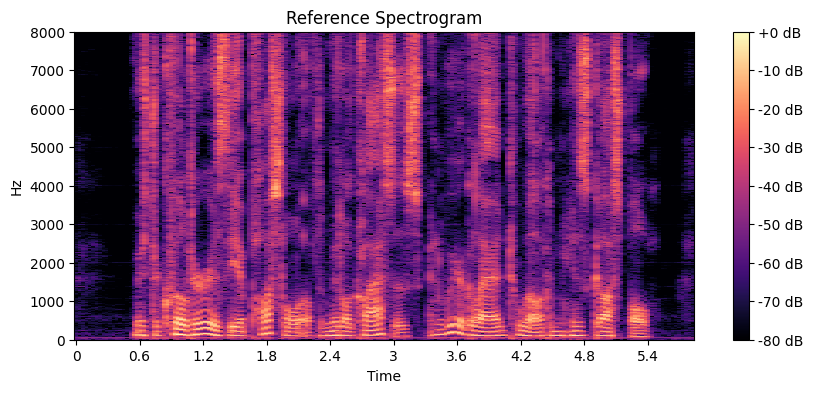

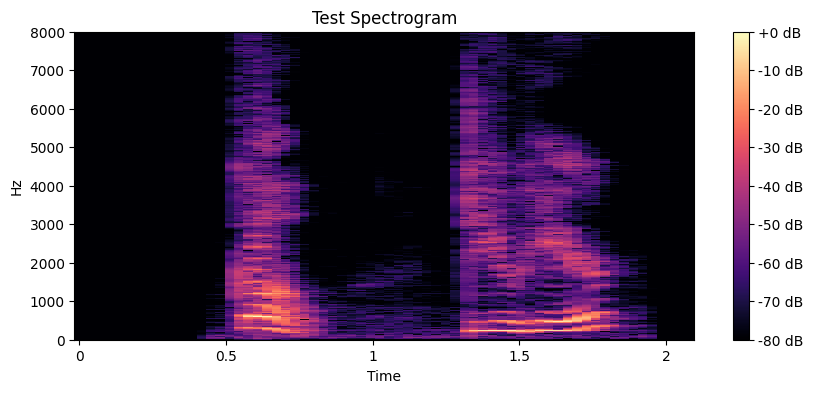

In [19]:
import matplotlib.pyplot as plt

# Function to plot spectrogram
def plot_spectrogram(file_path, title):
    y, sr = librosa.load(file_path, sr=None)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.savefig(f"{title}.png")
    plt.show()

# Plot spectrograms
plot_spectrogram(ref_file, "Reference Spectrogram")
plot_spectrogram(test_file, "Test Spectrogram")